# **üè† Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä Baseline code**
> Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä ÏòàÏ∏° ÎåÄÌöåÏóê Ïò§Ïã† Ïó¨Îü¨Î∂Ñ ÌôòÏòÅÌï©ÎãàÎã§! üéâ     
> ÏïÑÎûò baselineÏóêÏÑúÎäî RandomForestÎ•º ÌôúÏö©Ìï¥ ML Î∞©Î≤ïÎ°†Îì§ÏùÑ Ïã§Ï†ú ÎåÄÌöåÏóê Ï†ÅÏö©Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
> Í∞ïÏùòÎäî google colabÏúºÎ°ú Ïã§ÌñâÌïòÏòÄÍ∏∞Ïóê ÏïÑÎûòÏùò Î≤†Ïù¥Ïä§ÎùºÏù∏ ÏΩîÎìúÏôÄÎäî ÏùºÎ∂Ä Ï∞®Ïù¥Í∞Ä ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§. 

## Contents
- Library Import
- Data Load
- Data Preprocessing
- Feature Engineering
- Model Training
- Inference
- Output File Save


## 1. Library Import
- ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§.

In [1]:
%pip install eli5==0.13.0

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÇ¨Ïö©ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§.
!apt-get install -y fonts-nanum

Note: you may need to restart the kernel to use updated packages.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 50 not upgraded.


In [1]:
KAKAO_API_KEY = 'cb6d5d8a448c1a2344a636a2888775aa'

In [2]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Í≤ΩÎ°ú
    name='NanumBarunGothic')                        # Ïù¥ Ìè∞Ìä∏Ïùò ÏõêÌïòÎäî Ïù¥Î¶Ñ ÏÑ§Ï†ï
fm.fontManager.ttflist.insert(0, fe)              # MatplotlibÏóê Ìè∞Ìä∏ Ï∂îÍ∞Ä
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')
from sklearn.neighbors import BallTree

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

import eli5
from eli5.sklearn import PermutationImportance

# Network
import requests
import json

## 2. Data Load

#### 2.1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [3]:
# ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Î•º load ÌïòÍ≤†ÏäµÎãàÎã§. Í≤ΩÎ°úÎäî ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏßÄÏ†ïÌï¥Ï£ºÎ©¥ Îê©ÎãàÎã§.
train_path = '/data/ephemeral/home/train.csv'
test_path  = '/data/ephemeral/home/test.csv'
dt = pd.read_csv(train_path)
dt_test = pd.read_csv(test_path)

In [369]:
bus_path = '/data/ephemeral/home/bus_feature.csv'
subway_path = '/data/ephemeral/home/subway_feature.csv'
dt_bus = pd.read_csv(bus_path)
dt_subway = pd.read_csv(subway_path)

In [370]:
address_path = '/data/ephemeral/home/address_data.csv'
dt_addr = pd.read_csv(address_path)

In [5]:
display(len(dt))
display(len(dt_addr))

1118822

1128094

In [3]:
# Train dataÏôÄ Test data shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print('Train data shape : ', dt.shape, 'Test data shape : ', dt_test.shape)

Train data shape :  (1118822, 52) Test data shape :  (9272, 51)


In [5]:
# TrainÍ≥º Test dataÎ•º ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.
display(dt.head(1))
display(dt_test.head(1))      # Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä(=Target) columnÏù¥ Ï†úÏô∏Îêú Î™®ÏäµÏûÖÎãàÎã§.

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö  Ï†ÑÏö©Î©¥Ï†Å(„é°)    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97  201712    8  3  1987   

   ...    Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä  \
0  ...  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y   

  Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú        Ï¢åÌëúX        Ï¢åÌëúY                  Îã®ÏßÄÏã†Ï≤≠Ïùº  target  
0       N  127.05721  37.476763  2022-11-17 10:19:06.0  124000  

[1 rows x 52 columns]

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö  Ï†ÑÏö©Î©¥Ï†Å(„é°)    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97  202307   26  5  1987   

   ... Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú    Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº  \
0  ...      ÏßÅÏòÅ  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0   

  ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú        Ï¢åÌëúX        Ï¢åÌëúY                  Îã®ÏßÄÏã†Ï≤≠Ïùº  
0      Y       N  127.05721  37.476763  2022-11-17 10:19:06.0  

[1 rows x 51 columns]

## 3. Data Preprocessing

- Î™®Îç∏ÎßÅ Ï†ÑÏóê Îç∞Ïù¥ÌÑ∞ ÎÇ¥ Í≤∞Ï∏°Ïπò, Ïù¥ÏÉÅÏπò Îì±ÏùÑ Ï†úÍ±∞ÌïòÍ≥† Î≤îÏ£ºÌòïÍ≥º Ïó∞ÏÜçÌòï Î≥ÄÏàòÎ•º ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§!
- Î®ºÏ†Ä, Ïö©Ïù¥Ìïú Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ trainÍ≥º test dataÎ•º Ìï©Ïπú ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÏßÑÌñâÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [4]:
# train/test Íµ¨Î∂ÑÏùÑ ÏúÑÌïú ÏπºÎüºÏùÑ ÌïòÎÇò ÎßåÎì§Ïñ¥ Ï§çÎãàÎã§.
dt['is_test'] = 0
dt_test['is_test'] = 1
concat = pd.concat([dt, dt_test])     # ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÎßåÎì§Ïñ¥Ï§çÎãàÎã§.

In [447]:
concat['is_test'].value_counts()      # trainÍ≥º test dataÍ∞Ä ÌïòÎÇòÎ°ú Ìï©Ï≥êÏßÑ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

0    1118822
1       9272
Name: is_test, dtype: int64

In [57]:
display(concat.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128094 entries, 0 to 9271
Data columns (total 53 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ÏãúÍµ∞Íµ¨                     1128094 non-null  object 
 1   Î≤àÏßÄ                      1127867 non-null  object 
 2   Î≥∏Î≤à                      1128019 non-null  float64
 3   Î∂ÄÎ≤à                      1128019 non-null  float64
 4   ÏïÑÌååÌä∏Î™Ö                    1125958 non-null  object 
 5   Ï†ÑÏö©Î©¥Ï†Å                    1128094 non-null  float64
 6   Í≥ÑÏïΩÎÖÑÏõî                    1128094 non-null  int64  
 7   Í≥ÑÏïΩÏùº                     1128094 non-null  int64  
 8   Ï∏µ                       1128094 non-null  int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                    1128094 non-null  int64  
 10  ÎèÑÎ°úÎ™Ö                     1128094 non-null  object 
 11  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                 6195 non-null     float64
 12  Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê                  1

None

In [5]:
# ÏπºÎüº Ïù¥Î¶ÑÏùÑ ÏâΩÍ≤å Î∞îÍøîÏ£ºÍ≤†ÏäµÎãàÎã§. Îã§Î•∏ ÏπºÎüºÎèÑ ÏÇ¨Ïö©Ïóê Îî∞Îùº Î∞îÍøîÏ£ºÏÖîÎèÑ Îê©ÎãàÎã§!
concat = concat.rename(columns={'Ï†ÑÏö©Î©¥Ï†Å(„é°)':'Ï†ÑÏö©Î©¥Ï†Å'})

In [428]:
display(dt.head(1))

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö  Ï†ÑÏö©Î©¥Ï†Å(„é°)    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97  201712    8  3  1987   

   ...   Ï£ºÏ∞®ÎåÄÏàò  Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú  \
0  ...  262.0                   ÏûÑÏùò  2022-11-17 13:00:29.0      Y       N   

         Ï¢åÌëúX        Ï¢åÌëúY                  Îã®ÏßÄÏã†Ï≤≠Ïùº  target is_test  
0  127.05721  37.476763  2022-11-17 10:19:06.0  124000       0  

[1 rows x 53 columns]

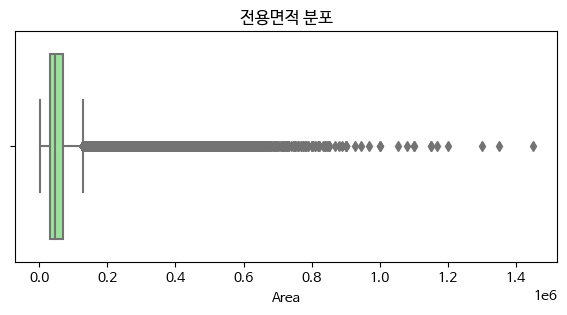

In [ ]:
# ÎåÄÌëúÏ†ÅÏù∏ Ïó∞ÏÜçÌòï Î≥ÄÏàòÏù∏ ‚ÄúÏ†ÑÏö© Î©¥Ï†Å‚Äù Î≥ÄÏàò Í¥ÄÎ†®Ìïú Î∂ÑÌè¨Î•º Î®ºÏ†Ä ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = dt, x = "target", color="lightgreen")
plt.title("Target Î∂ÑÌè¨")
plt.xlabel('Area')
plt.show()

### 3.1. Í≤∞Ï∏°Ïπò ÌÉêÏÉâ Î∞è Î≥¥Í∞Ñ
- Í≤∞Ï∏°ÏπòÎ•º Ï≤òÎ¶¨Ìï† Îïå ÎßéÏù¥ Ïì∞Îäî Î∞©Î≤ïÏùÄ ÏÇ≠Ï†ú(Deletion)Í≥º ÎåÄÏ≤¥(Imputation) ÏûÖÎãàÎã§.
- 

In [61]:
display(len(concat))
display(len(dt_addr))

1128094

1128094

In [62]:
display(concat[['ÏãúÍµ∞Íµ¨','Î≤àÏßÄ','Î≥∏Î≤à','ÎèÑÎ°úÎ™Ö']].head(2))
display(concat[['ÏãúÍµ∞Íµ¨','Î≤àÏßÄ','Î≥∏Î≤à','ÎèÑÎ°úÎ™Ö']].tail(2))

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à    ÎèÑÎ°úÎ™Ö
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  Ïñ∏Ï£ºÎ°ú 3
1  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  Ïñ∏Ï£ºÎ°ú 3

ÏãúÍµ∞Íµ¨   Î≤àÏßÄ     Î≥∏Î≤à        ÎèÑÎ°úÎ™Ö
9270  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï§ëÎûëÍµ¨ Ïã†ÎÇ¥Îèô  816  816.0  Ïã†ÎÇ¥Ïó≠Î°ú1Í∏∏ 85
9271  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï§ëÎûëÍµ¨ Ïã†ÎÇ¥Îèô  816  816.0  Ïã†ÎÇ¥Ïó≠Î°ú1Í∏∏ 85

In [23]:
# Ï§ëÎ≥µÎêú Ìñâ Ïó¨Î∂ÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî Î∂àÎ¶¨Ïñ∏ ÏãúÎ¶¨Ï¶à ÏÉùÏÑ±
duplicate_rows = concat.duplicated(subset=['ÎèÑÎ°úÎ™Ö'])

# Ï§ëÎ≥µÎêú ÌñâÏùò Ïàò Í≥ÑÏÇ∞
num_duplicates = duplicate_rows.sum()

print(f"'ÎèÑÎ°úÎ™Ö'ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ï§ëÎ≥µÎêú ÌñâÏùò Ïàò: {num_duplicates}Í∞ú")
print(f"Ï†ÑÏ≤¥ÏóêÏÑú Ï§ëÎ≥µÎêú Îç∞Ïù¥ÌÑ∞Î•º Î∫Ä Í∞úÏàò: {len(concat) - num_duplicates}Í∞ú")

'ÎèÑÎ°úÎ™Ö'ÏùÑ Í∏∞Ï§ÄÏúºÎ°ú Ï§ëÎ≥µÎêú ÌñâÏùò Ïàò: 1118849Í∞ú
Ï†ÑÏ≤¥ÏóêÏÑú Ï§ëÎ≥µÎêú Îç∞Ïù¥ÌÑ∞Î•º Î∫Ä Í∞úÏàò: 9245Í∞ú


In [6]:
unique_addr_df = concat[['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'ÎèÑÎ°úÎ™Ö', 'ÏïÑÌååÌä∏Î™Ö', 'Ï¢åÌëúX', 'Ï¢åÌëúY']].drop_duplicates(subset='ÎèÑÎ°úÎ™Ö')
display(len(unique_addr_df))
display(unique_addr_df.head())

9245

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ         ÎèÑÎ°úÎ™Ö     ÏïÑÌååÌä∏Î™Ö         Ï¢åÌëúX        Ï¢åÌëúY
0   ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1       Ïñ∏Ï£ºÎ°ú 3   Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  127.057210  37.476763
12  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô    652     Í∞úÌè¨Î°ú 307   Í∞úÌè¨Ïö∞ÏÑ±3Ï∞®  127.055990  37.483894
25  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô   12-2  Í∞úÌè¨Î°ú109Í∏∏ 69     Í∞úÌè¨ÏûêÏù¥  127.076624  37.496296
38  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô    141     Í∞úÌè¨Î°ú 310  Í∞úÌè¨Ï£ºÍ≥µ1Îã®ÏßÄ  127.058521  37.480002
44  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô    141       ÏÑ†Î¶âÎ°ú 7  Í∞úÌè¨Ï£ºÍ≥µ1Îã®ÏßÄ  127.058521  37.480002

In [8]:
display(unique_addr_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9245 entries, 0 to 9050
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ÏãúÍµ∞Íµ¨     9245 non-null   object 
 1   Î≤àÏßÄ      9243 non-null   object 
 2   ÎèÑÎ°úÎ™Ö     9245 non-null   object 
 3   ÏïÑÌååÌä∏Î™Ö    8964 non-null   object 
 4   Ï¢åÌëúX     821 non-null    float64
 5   Ï¢åÌëúY     821 non-null    float64
dtypes: float64(2), object(4)
memory usage: 505.6+ KB


None

In [9]:
# Ïπ¥Ïπ¥Ïò§ Ìï®Ïàò Ìò∏Ï∂ú Ï†ïÏùò
def get_lat_lng(address):
    url = 'https://dapi.kakao.com/v2/local/search/address.json'
    headers = {"Authorization": f"KakaoAK {KAKAO_API_KEY}"}
    params = {'query': address}
    
    response = requests.get(url, headers=headers, params=params)
    
    if response.status_code == 200:
        result = response.json()
        if result['documents']:
            y = result['documents'][0]['y']
            x = result['documents'][0]['x']
            # documents Î¶¨ÌÑ¥Í∞í Ï∂úÎ†•
            # display(result['documents'])
            return y, x  # ÏúÑÎèÑ(y), Í≤ΩÎèÑ(x)
    return None, None

In [10]:
# Ïú†Ìö®Ìïú Ï£ºÏÜåÏóê ÎåÄÌï¥ ÏúÑÎèÑÏôÄ Í≤ΩÎèÑ Í∞ÄÏ†∏Ïò§Í∏∞
pre_addr = None
pre_lat, pre_lng = None, None

for i, row in tqdm(unique_addr_df.iterrows()):
    address = row['ÎèÑÎ°úÎ™Ö']  
    if pd.isna(row['Ï¢åÌëúX']):   
        # if address == pre_addr:
        #     lat, lng = pre_lat, pre_lng        
        # else:
        #     # display('Ìò∏Ï∂ú')
        #     lat, lng = get_lat_lng(address)
        #     pre_addr = address
        #     pre_lat, pre_lng = lat, lng      

        lat, lng = get_lat_lng(address)
        if lat is not None and lng is not None:
            pre_addr = address
            pre_lat, pre_lng = lat, lng
        else:
            address = f"{row['ÏãúÍµ∞Íµ¨']} {row['Î≤àÏßÄ']}"
            lat, lng = get_lat_lng(address)
            if lat is not None and lng is not None:
                pre_addr = address
                pre_lat, pre_lng = lat, lng
            else:
                address = f"{row['ÏãúÍµ∞Íµ¨']}"
                lat, lng = get_lat_lng(address)
                if lat is not None and lng is not None:
                    pre_addr = address
                    pre_lat, pre_lng = lat, lng
                else:
                    print(f"Ï¢åÌëúÎ•º Í∞ÄÏ†∏Ïò§ÏßÄ Î™ªÌñàÏäµÎãàÎã§: {address}")
                    lat, lng = pre_lat, pre_lng
        
        # Í∞í ÏÑ∏ÌåÖ
        unique_addr_df.at[i,'Ï¢åÌëúY'] = lat       
        unique_addr_df.at[i,'Ï¢åÌëúX'] = lng

display(unique_addr_df)

9245it [10:15, 15.01it/s]


ÏãúÍµ∞Íµ¨      Î≤àÏßÄ         ÎèÑÎ°úÎ™Ö           ÏïÑÌååÌä∏Î™Ö               Ï¢åÌëúX  \
0      ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô   658-1       Ïñ∏Ï£ºÎ°ú 3         Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±         127.05721   
12     ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô     652     Í∞úÌè¨Î°ú 307         Í∞úÌè¨Ïö∞ÏÑ±3Ï∞®         127.05599   
25     ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô    12-2  Í∞úÌè¨Î°ú109Í∏∏ 69           Í∞úÌè¨ÏûêÏù¥        127.076624   
38     ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô     141     Í∞úÌè¨Î°ú 310        Í∞úÌè¨Ï£ºÍ≥µ1Îã®ÏßÄ        127.058521   
44     ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô     141       ÏÑ†Î¶âÎ°ú 7        Í∞úÌè¨Ï£ºÍ≥µ1Îã®ÏßÄ        127.058521   
...              ...     ...         ...            ...               ...   
4581   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎèôÏûëÍµ¨ ÌùëÏÑùÎèô  253-89      ÏÑúÎã¨Î°ú 90       ÌùëÏÑùÎ¶¨Î≤ÑÌååÌÅ¨ÏûêÏù¥  126.963346676611   
4738   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÎßàÌè¨Íµ¨ Ïã†ÏàòÎèô   400-1    ÌÜ†Ï†ïÎ°ú17Í∏∏ 6        Ïã†ÏàòÎèôÎ•¥ÎÅåÎ†àÎ∏å   126.93592659087   
6087   ÏÑúÏö∏ÌäπÎ≥ÑÏãú ÏÑ±ÎèôÍµ¨ ÏÜ°Ï†ïÎèô    67-5      ÏÜ°Ï†ïÍ∏∏ 32      ÌûàÌéòÎ¶¨Ïò®Î¶¨Î≤ÑÌå∞Î¶¨Ïä§  127.063395492673   
8880  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï§ëÍµ¨ Ïù∏ÌòÑÎèô2Í∞Ä     240     ÎßàÎ•∏ÎÇ¥Î°ú 79     ÏÑ∏Ïö¥Ìë∏Î•¥ÏßÄÏò§Ìó§Î¶¨ÏãúÌã∞          126.9966   
9050    ÏÑúÏö∏ÌäπÎ≥ÑÏãú Ï§ëÍµ¨ ÏûÖÏ†ïÎèô     277   ÏùÑÏßÄÎ°ú15Í∏∏ 31  ÌûêÏä§ÌÖåÏù¥Ìä∏ÏÑ∏Ïö¥ÏÑºÌä∏Îü¥1Îã®ÏßÄ  126.993125706646   

                   Ï¢åÌëúY  
0            37.476763  
12           37.483894  
25           37.496296  
38           37.480002  
44           37.480002  
...                ...  
4581  37.5024629483784  
4738  37.5448433292108  
6087  37.5487289822502  
8880         37.564541  
9050  37.5680964267774  

[9245 rows x 6 columns]

In [14]:
concat.isnull().sum()

ÏãúÍµ∞Íµ¨                             0
Î≤àÏßÄ                            227
Î≥∏Î≤à                             75
Î∂ÄÎ≤à                             75
ÏïÑÌååÌä∏Î™Ö                         2136
Ï†ÑÏö©Î©¥Ï†Å                            0
Í≥ÑÏïΩÎÖÑÏõî                            0
Í≥ÑÏïΩÏùº                             0
Ï∏µ                               0
Í±¥Ï∂ïÎÖÑÎèÑ                            0
ÎèÑÎ°úÎ™Ö                             0
Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                   1121899
Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê                          0
Í±∞ÎûòÏú†Ìòï                            0
Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ                          0
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)         877273
k-Ï†ÑÌôîÎ≤àÌò∏                     876850
k-Ìå©Ïä§Î≤àÌò∏                     879348
Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob                1058958
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)               876125
k-Í¥ÄÎ¶¨Î∞©Ïãù                     876125
k-Î≥µÎèÑÏú†Ìòï                     876454
k-ÎÇúÎ∞©Î∞©Ïãù                     876125
k-Ï†ÑÏ≤¥ÎèôÏàò

In [12]:
# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ CSV ÌååÏùºÎ°ú Ï†ÄÏû• 
unique_addr_df.to_csv('../unique_address.csv', index=False) 
print("CSV ÌååÏùº Ï†ÄÏû•Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.")

CSV ÌååÏùº Ï†ÄÏû•Ïù¥ ÏôÑÎ£åÎêòÏóàÏäµÎãàÎã§.


In [13]:
display(concat.index)
display(unique_addr_df.index)
# dt_addr_selected.index = concat.index
# display(concat.index)
# display(dt_addr_selected.index)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9262, 9263, 9264, 9265, 9266, 9267, 9268, 9269, 9270, 9271],
           dtype='int64', length=1128094)

Int64Index([   0,   12,   25,   38,   44,  204,  242,  289,  309,  324,
            ...
            1274, 1370, 2138, 2429, 3161, 4581, 4738, 6087, 8880, 9050],
           dtype='int64', length=9245)

In [17]:
# 'ÎèÑÎ°úÎ™Ö' Ïª¨ÎüºÏù¥ Î¨∏ÏûêÏó¥ ÌÉÄÏûÖÏù∏ÏßÄ ÌôïÏù∏ÌïòÍ≥† ÌÜµÏùºÌï©ÎãàÎã§.
concat['ÎèÑÎ°úÎ™Ö'] = concat['ÎèÑÎ°úÎ™Ö'].astype(str)
unique_addr_df['ÎèÑÎ°úÎ™Ö'] = unique_addr_df['ÎèÑÎ°úÎ™Ö'].astype(str)

In [18]:
# ÏÑúÎ∏å Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú 'ÎèÑÎ°úÎ™Ö'ÏùÑ Ïù∏Îç±Ïä§Î°ú ÏÑ§Ï†ïÌï©ÎãàÎã§.
unique_addr_df.set_index('ÎèÑÎ°úÎ™Ö', inplace=True)

In [19]:
# ÏÑúÎ∏å Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú 'Ï¢åÌëúX'ÏôÄ 'Ï¢åÌëúY'Ïùò ÎîïÏÖîÎÑàÎ¶¨ ÏÉùÏÑ±
coord_x_map = unique_addr_df['Ï¢åÌëúX']
coord_y_map = unique_addr_df['Ï¢åÌëúY']

# Î©îÏù∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò 'Ï¢åÌëúX' Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
concat['Ï¢åÌëúX'] = concat['Ï¢åÌëúX'].fillna(concat['ÎèÑÎ°úÎ™Ö'].map(coord_x_map))

# Î©îÏù∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò 'Ï¢åÌëúY' Í≤∞Ï∏°Ïπò Ï±ÑÏö∞Í∏∞
concat['Ï¢åÌëúY'] = concat['Ï¢åÌëúY'].fillna(concat['ÎèÑÎ°úÎ™Ö'].map(coord_y_map))

In [20]:
display(concat.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128094 entries, 0 to 9271
Data columns (total 53 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ÏãúÍµ∞Íµ¨                     1128094 non-null  object 
 1   Î≤àÏßÄ                      1127867 non-null  object 
 2   Î≥∏Î≤à                      1128019 non-null  float64
 3   Î∂ÄÎ≤à                      1128019 non-null  float64
 4   ÏïÑÌååÌä∏Î™Ö                    1125958 non-null  object 
 5   Ï†ÑÏö©Î©¥Ï†Å                    1128094 non-null  float64
 6   Í≥ÑÏïΩÎÖÑÏõî                    1128094 non-null  int64  
 7   Í≥ÑÏïΩÏùº                     1128094 non-null  int64  
 8   Ï∏µ                       1128094 non-null  int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                    1128094 non-null  int64  
 10  ÎèÑÎ°úÎ™Ö                     1128094 non-null  object 
 11  Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                 6195 non-null     float64
 12  Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê                  1

None

In [375]:
display(concat[['ÏïÑÌååÌä∏Î™Ö']].isna().sum())
missing_apartments_df = concat[concat['ÏïÑÌååÌä∏Î™Ö'].isnull()][['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'ÎèÑÎ°úÎ™Ö', 'Ï¢åÌëúX', 'Ï¢åÌëúY']]
display(missing_apartments_df[20:30])

ÏïÑÌååÌä∏Î™Ö    2136
dtype: int64

ÏãúÍµ∞Íµ¨      Î≤àÏßÄ            ÎèÑÎ°úÎ™Ö         Ï¢åÌëúX        Ï¢åÌëúY
25403  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨ Íµ¨Î°úÎèô  744-19   Íµ¨Î°úÎèôÎ°ú20Í∏∏ 42-2  127.063356  37.501358
25404  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨ Íµ¨Î°úÎèô  745-14   Íµ¨Î°úÎèôÎ°ú18Í∏∏ 30-6  127.063356  37.501358
25405  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨ Íµ¨Î°úÎèô  745-57  Íµ¨Î°úÎèôÎ°ú12Í∏∏ 16-12  127.063356  37.501358
25406  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨ Íµ¨Î°úÎèô  747-52    Íµ¨Î°úÎèôÎ°ú8Í∏∏ 18-7  127.063356  37.501358
25407  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨ Íµ¨Î°úÎèô  749-57  Íµ¨Î°úÎèôÎ°ú20Í∏∏ 58-11  127.063356  37.501358
25408  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨ Íµ¨Î°úÎèô  750-13      Íµ¨Î°úÎèôÎ°ú8Í∏∏ 48  127.063356  37.501358
25409  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨ Íµ¨Î°úÎèô  750-15      Íµ¨Î°úÎèôÎ°ú8Í∏∏ 50  127.063356  37.501358
25410  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨ Íµ¨Î°úÎèô   750-8  Íµ¨Î°úÎèôÎ°ú20Í∏∏ 52-12  127.063356  37.501358
25411  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨ Íµ¨Î°úÎèô   750-8  Íµ¨Î°úÎèôÎ°ú20Í∏∏ 52-12  127.063356  37.501358
25412  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Íµ¨Î°úÍµ¨ Íµ¨Î°úÎèô  751-32   Íµ¨Î°úÎèôÎ°ú20Í∏∏ 55-3  127.063356  37.501358

In [21]:
concat[['ÏïÑÌååÌä∏Î™Ö']] = concat[['ÏïÑÌååÌä∏Î™Ö']].fillna('Ïù¥Î¶ÑÏóÜÏùå')

In [377]:
# Ïã§Ï†úÎ°ú Í≤∞Ï∏°ÏπòÎùºÍ≥† ÌëúÏãúÎäî ÏïàÎêòÏñ¥ÏûàÏßÄÎßå ÏïÑÎ¨¥ ÏùòÎØ∏ÎèÑ Í∞ñÏßÄ ÏïäÎäî elementÎì§Ïù¥ ÏïÑÎûòÏôÄ Í∞ôÏù¥ Ï°¥Ïû¨Ìï©ÎãàÎã§.
# ÏïÑÎûò 3Í∞ÄÏßÄÏùò Í≤ΩÏö∞ Î™®Îëê ÏïÑÎ¨¥ ÏùòÎØ∏ÎèÑ Í∞ñÏßÄ ÏïäÎäî elementÍ∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.
display(concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'].value_counts())

            1111271
20230630        585
20230831        496
20230428        394
20230731        374
             ...   
20230105          3
20230125          3
20230109          1
20230102          1
20230104          1
Name: Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê, Length: 182, dtype: int64

In [378]:
display(concat['Í±∞ÎûòÏú†Ìòï'].value_counts())

-       1086451
Ï§ëÍ∞úÍ±∞Îûò      38123
ÏßÅÍ±∞Îûò        3520
Name: Í±∞ÎûòÏú†Ìòï, dtype: int64

In [379]:
display(concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'].value_counts())

-                    1090013
ÏÑúÏö∏ ÎÖ∏ÏõêÍµ¨                  2627
ÏÑúÏö∏ ÏÜ°ÌååÍµ¨                  2540
ÏÑúÏö∏ Í∞ïÎÇ®Íµ¨                  2508
ÏÑúÏö∏ Í∞ïÎèôÍµ¨                  2038
                      ...   
ÏÑúÏö∏ Í∞ïÎ∂ÅÍµ¨, ÏÑúÏö∏ ÏñëÏ≤úÍµ¨             1
Í≤ΩÍ∏∞ ÎÇ®ÏñëÏ£ºÏãú, Í≤ΩÍ∏∞ ÏÑ±ÎÇ®ÏàòÏ†ïÍµ¨          1
ÏÑúÏö∏ ÏÜ°ÌååÍµ¨, Ïù∏Ï≤ú Í≥ÑÏñëÍµ¨             1
Í≤ΩÍ∏∞ Ïó∞Ï≤úÍµ∞, ÏÑúÏö∏ ÏÜ°ÌååÍµ¨             1
ÏÑúÏö∏ Ï§ëÎûëÍµ¨, Ïù∏Ï≤ú Î∂ÄÌèâÍµ¨             1
Name: Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ, Length: 739, dtype: int64

In [24]:
# ÏúÑ Ï≤òÎüº ÏïÑÎ¨¥ ÏùòÎØ∏ÎèÑ Í∞ñÏßÄ ÏïäÎäî ÏπºÎüºÏùÄ Í≤∞Ï∏°ÏπòÏôÄ Í∞ôÏùÄ Ïó≠Ìï†ÏùÑ ÌïòÎØÄÎ°ú, np.nanÏúºÎ°ú Ï±ÑÏõå Í≤∞Ï∏°ÏπòÎ°ú Ïù∏ÏãùÎêòÎèÑÎ°ù Ìï©ÎãàÎã§.
concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'] = concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'].replace(' ', np.nan)
concat['Í±∞ÎûòÏú†Ìòï'] = concat['Í±∞ÎûòÏú†Ìòï'].replace('-', np.nan)
concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'] = concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'].replace('-', np.nan)

In [25]:
concat.isnull().sum()

ÏãúÍµ∞Íµ¨                             0
Î≤àÏßÄ                            227
Î≥∏Î≤à                             75
Î∂ÄÎ≤à                             75
ÏïÑÌååÌä∏Î™Ö                            0
Ï†ÑÏö©Î©¥Ï†Å                            0
Í≥ÑÏïΩÎÖÑÏõî                            0
Í≥ÑÏïΩÏùº                             0
Ï∏µ                               0
Í±¥Ï∂ïÎÖÑÎèÑ                            0
ÎèÑÎ°úÎ™Ö                             0
Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                   1121899
Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê                    1111271
Í±∞ÎûòÏú†Ìòï                      1086451
Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ                    1090013
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)         877273
k-Ï†ÑÌôîÎ≤àÌò∏                     876850
k-Ìå©Ïä§Î≤àÌò∏                     879348
Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob                1058958
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)               876125
k-Í¥ÄÎ¶¨Î∞©Ïãù                     876125
k-Î≥µÎèÑÏú†Ìòï                     876454
k-ÎÇúÎ∞©Î∞©Ïãù                     876125
k-Ï†ÑÏ≤¥ÎèôÏàò

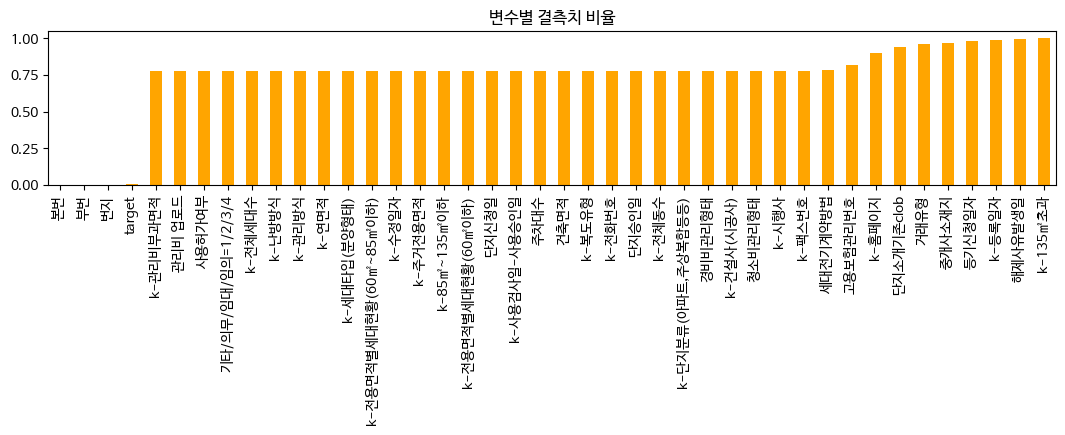

In [26]:
# Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°ÏπòÏùò ÎπÑÏú®ÏùÑ plotÏúºÎ°ú Í∑∏Î†§Î≥¥Î©¥ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
fig = plt.figure(figsize=(13, 2))
missing = concat.isnull().sum() / concat.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°Ïπò ÎπÑÏú®')
plt.show()

- ÏúÑ Í∑∏ÎûòÌîÑÏóêÏÑú Î≥º Ïàò ÏûàÎã§ÏãúÌîº Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ ÏπºÎüºÎì§ÏùÄ Í≤∞Ï∏°ÏπòÍ∞Ä Ìï¥Îãπ ÏπºÎüºÏùò element Ï§ë 90% Ïù¥ÏÉÅÏùÑ Ï∞®ÏßÄÌïòÎäî ÏÉÅÌô©Ïù¥ Îê©ÎãàÎã§.
- Îî∞ÎùºÏÑú Î≥∏ Baseline ÏóêÏÑúÎäî Ïù¥ ÏπºÎüºÏùÄ ÏòàÏ∏°Ïóê ÎèÑÏõÄÏù¥ ÎêòÏßÄ ÏïäÎäîÎã§Í≥† ÌåêÎã®Ìï¥ ÏÇ≠Ï†úÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [27]:
# NullÍ∞íÏù¥ 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ ÏπºÎüºÏùÄ ÏÇ≠Ï†úÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
print("* Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÌïòÏù∏ Î≥ÄÏàòÎì§ :", list(concat.columns[concat.isnull().sum() <= 1000000]))     # ÎÇ®Í≤®Ïßà Î≥ÄÏàòÎì§ÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print("* Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ Î≥ÄÏàòÎì§ :", list(concat.columns[concat.isnull().sum() >= 1000000]))

* Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÌïòÏù∏ Î≥ÄÏàòÎì§ : ['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'target', 'is_test']
* Í≤∞Ï∏°ÏπòÍ∞Ä 1

In [28]:
# ÏúÑÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÌïòÏù∏ Î≥ÄÏàòÎì§Îßå Í≥®Îùº ÏÉàÎ°úÏö¥ concat_select Í∞ùÏ≤¥Î°ú Ï†ÄÏû•Ìï¥Ï§çÎãàÎã§.
selected = list(concat.columns[concat.isnull().sum() <= 1000000])
concat_select = concat[selected]

In [29]:
display(concat_select.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128094 entries, 0 to 9271
Data columns (total 45 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ÏãúÍµ∞Íµ¨                     1128094 non-null  object 
 1   Î≤àÏßÄ                      1127867 non-null  object 
 2   Î≥∏Î≤à                      1128019 non-null  float64
 3   Î∂ÄÎ≤à                      1128019 non-null  float64
 4   ÏïÑÌååÌä∏Î™Ö                    1128094 non-null  object 
 5   Ï†ÑÏö©Î©¥Ï†Å                    1128094 non-null  float64
 6   Í≥ÑÏïΩÎÖÑÏõî                    1128094 non-null  int64  
 7   Í≥ÑÏïΩÏùº                     1128094 non-null  int64  
 8   Ï∏µ                       1128094 non-null  int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                    1128094 non-null  int64  
 10  ÎèÑÎ°úÎ™Ö                     1128094 non-null  object 
 11  k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)      250821 non-null   object 
 12  k-Ï†ÑÌôîÎ≤àÌò∏           

None

In [30]:
concat_select.isnull().sum()     # Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ï¥àÍ≥ºÏù∏ ÏπºÎüºÏù¥ Ï†úÍ±∞Îêú Î™®ÏäµÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
# targetÎ≥ÄÏàòÎäî test dataset Í∞úÏàòÎßåÌÅº(9272) Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨Ìï®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

ÏãúÍµ∞Íµ¨                            0
Î≤àÏßÄ                           227
Î≥∏Î≤à                            75
Î∂ÄÎ≤à                            75
ÏïÑÌååÌä∏Î™Ö                           0
Ï†ÑÏö©Î©¥Ï†Å                           0
Í≥ÑÏïΩÎÖÑÏõî                           0
Í≥ÑÏïΩÏùº                            0
Ï∏µ                              0
Í±¥Ï∂ïÎÖÑÎèÑ                           0
ÎèÑÎ°úÎ™Ö                            0
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)        877273
k-Ï†ÑÌôîÎ≤àÌò∏                    876850
k-Ìå©Ïä§Î≤àÌò∏                    879348
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)              876125
k-Í¥ÄÎ¶¨Î∞©Ïãù                    876125
k-Î≥µÎèÑÏú†Ìòï                    876454
k-ÎÇúÎ∞©Î∞©Ïãù                    876125
k-Ï†ÑÏ≤¥ÎèôÏàò                    877207
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                   876125
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)                877637
k-ÏãúÌñâÏÇ¨                     877834
k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº             876259
k-Ïó∞Î©¥Ï†Å                     876125


In [76]:
# Ïó∞ÏÜçÌòï Î≥ÄÏàòÎäî ÏÑ†ÌòïÎ≥¥Í∞ÑÏùÑ Ìï¥Ï£ºÍ≥†, Î≤îÏ£ºÌòïÎ≥ÄÏàòÎäî ÏïåÏàòÏóÜÍ∏∞Ïóê ‚Äúunknown‚ÄùÏù¥ÎùºÍ≥† ÏûÑÏùòÎ°ú Î≥¥Í∞ÑÌï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.
concat_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128094 entries, 0 to 9271
Data columns (total 45 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ÏãúÍµ∞Íµ¨                     1128094 non-null  object 
 1   Î≤àÏßÄ                      1127867 non-null  object 
 2   Î≥∏Î≤à                      1128019 non-null  float64
 3   Î∂ÄÎ≤à                      1128019 non-null  float64
 4   ÏïÑÌååÌä∏Î™Ö                    1125958 non-null  object 
 5   Ï†ÑÏö©Î©¥Ï†Å                    1128094 non-null  float64
 6   Í≥ÑÏïΩÎÖÑÏõî                    1128094 non-null  int64  
 7   Í≥ÑÏïΩÏùº                     1128094 non-null  int64  
 8   Ï∏µ                       1128094 non-null  int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                    1128094 non-null  int64  
 10  ÎèÑÎ°úÎ™Ö                     1128094 non-null  object 
 11  k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)      250821 non-null   object 
 12  k-Ï†ÑÌôîÎ≤àÌò∏           

In [31]:
# Î≥∏Î≤à, Î∂ÄÎ≤àÏùò Í≤ΩÏö∞ floatÎ°ú ÎêòÏñ¥ÏûàÏßÄÎßå Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò ÏùòÎØ∏Î•º Í∞ÄÏßÄÎØÄÎ°ú object(string) ÌòïÌÉúÎ°ú Î∞îÍæ∏Ïñ¥Ï£ºÍ≥† ÏïÑÎûò ÏûëÏóÖÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.
concat_select['Î≥∏Î≤à'] = concat_select['Î≥∏Î≤à'].astype('str')
concat_select['Î∂ÄÎ≤à'] = concat_select['Î∂ÄÎ≤à'].astype('str')

In [32]:
# Î®ºÏ†Ä, Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏúÑ infoÏóê Îî∞Îùº Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns = []
categorical_columns = []

for column in concat_select.columns:
    if pd.api.types.is_numeric_dtype(concat_select[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns)

Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'target', 'is_test']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'ÎèÑÎ°úÎ™Ö', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'Îã®ÏßÄÏã†Ï≤≠Ïùº']


- Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÍ∞Ä ÏïåÎßûÍ≤å ÎÇòÎàÑÏñ¥Ï°åÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í≥†, Ïù¥Ï†ú Í∞ÅÍ∞Å Î≥¥Í∞ÑÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.

In [33]:
# Î≤îÏ£ºÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î≥¥Í∞Ñ
concat_select[categorical_columns] = concat_select[categorical_columns].fillna('NULL')

# Ïó∞ÏÜçÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î≥¥Í∞Ñ (ÏÑ†Ìòï Î≥¥Í∞Ñ)
concat_select[continuous_columns] = concat_select[continuous_columns].interpolate(method='linear', axis=0)

In [34]:
concat_select.isnull().sum()         # Í≤∞Ï∏°ÏπòÍ∞Ä Î≥¥Í∞ÑÎêú Î™®ÏäµÏùÑ ÌôïÏù∏Ìï¥Î¥ÖÎãàÎã§.

ÏãúÍµ∞Íµ¨                       0
Î≤àÏßÄ                        0
Î≥∏Î≤à                        0
Î∂ÄÎ≤à                        0
ÏïÑÌååÌä∏Î™Ö                      0
Ï†ÑÏö©Î©¥Ï†Å                      0
Í≥ÑÏïΩÎÖÑÏõî                      0
Í≥ÑÏïΩÏùº                       0
Ï∏µ                         0
Í±¥Ï∂ïÎÖÑÎèÑ                      0
ÎèÑÎ°úÎ™Ö                       0
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)        0
k-Ï†ÑÌôîÎ≤àÌò∏                    0
k-Ìå©Ïä§Î≤àÌò∏                    0
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)              0
k-Í¥ÄÎ¶¨Î∞©Ïãù                    0
k-Î≥µÎèÑÏú†Ìòï                    0
k-ÎÇúÎ∞©Î∞©Ïãù                    0
k-Ï†ÑÏ≤¥ÎèôÏàò                    0
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                   0
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)                0
k-ÏãúÌñâÏÇ¨                     0
k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº             0
k-Ïó∞Î©¥Ï†Å                     0
k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                  0
k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å                 0
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥

- BaselineÏóêÏÑúÎäî Îã®Ïàú Í≤∞Ï∏°ÏπòÎì§ÏùÑ Ï†úÍ±∞ÌïòÍ±∞ÎÇò Î≥¥Í∞ÑÌñàÏßÄÎßå,
EDAÎ•º ÌÜµÌï¥ Î≥ÄÏàòÎì§Ïùò ÌùêÎ¶ÑÏùÑ Ï°∞Í∏à Îçî ÌååÏïÖÌïòÍ≥† Îçî ÎÇòÏùÄ interpolation Îì±Ïùò Î∞©Î≤ïÏùÑ Í≥†Î†§Ìï¥Î≥º Ïàò ÏûàÏùÑ Í≤É Í∞ôÏäµÎãàÎã§.

### 3.2. Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨
- Ïù¥Î≤àÏóî Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨Ìï¥Î¥ÖÏãúÎã§.
- Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨ÌïòÎäî Î∞©Î≤ïÏùÄ IQR, Z-score Îì± Îã§ÏñëÌïú Î∞©Î≤ïÏù¥ ÏûàÏäµÎãàÎã§. Í∞ÄÏû• ÏâΩÍ≥† ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú Ï†ëÍ∑ºÌïòÎäî Î∞©Î≤ïÏùÄ Í∏∞Î≥∏ ÌÜµÍ≥ÑÏπòÎ•º Ïù¥Ïö©ÌïòÎäî Í≤ÉÏûÖÎãàÎã§.
- Î≥∏ baselineÏóêÏÑúÎäî IQRÎ•º Ïù¥Ïö©Ìïú Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.

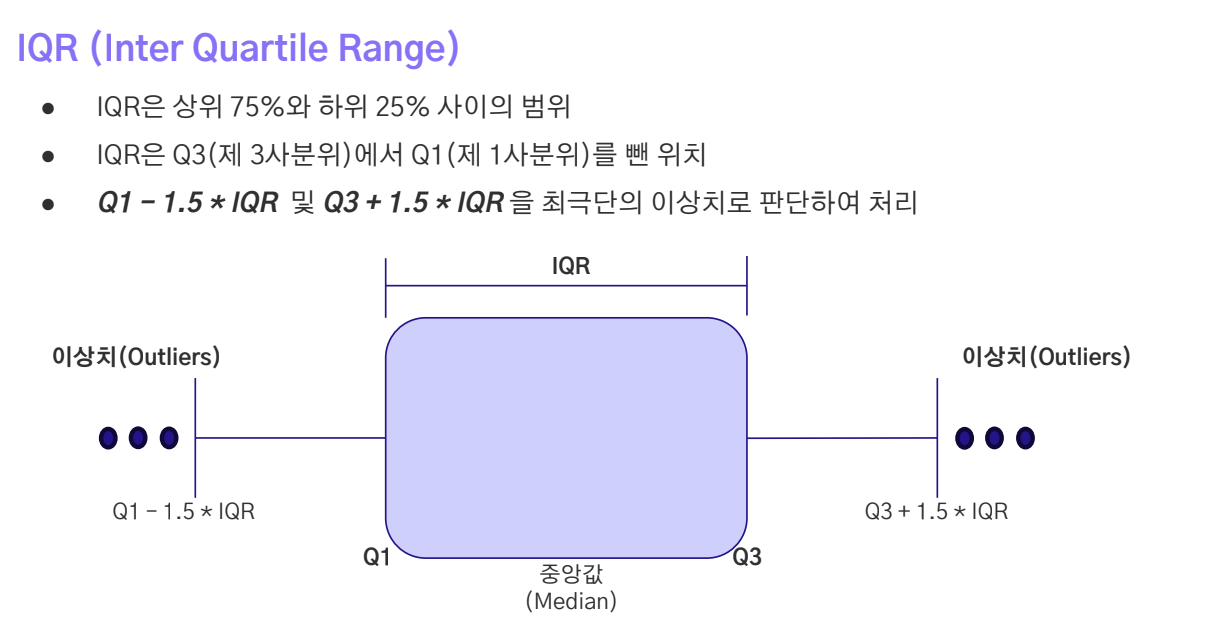

In [35]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Ïù¥Ï†ÑÏùò shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print(concat_select.shape)

(1128094, 45)


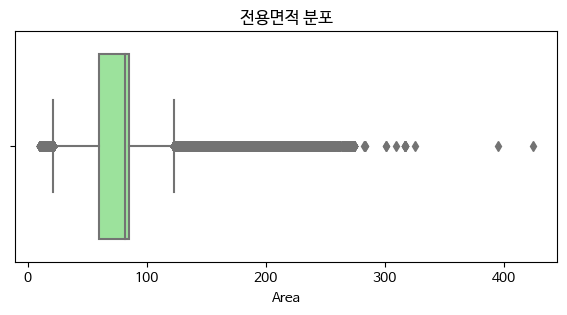

In [36]:
# ÎåÄÌëúÏ†ÅÏù∏ Ïó∞ÏÜçÌòï Î≥ÄÏàòÏù∏ ‚ÄúÏ†ÑÏö© Î©¥Ï†Å‚Äù Î≥ÄÏàò Í¥ÄÎ†®Ìïú Î∂ÑÌè¨Î•º Î®ºÏ†Ä ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = concat_select, x = "Ï†ÑÏö©Î©¥Ï†Å", color="lightgreen")
plt.title("Ï†ÑÏö©Î©¥Ï†Å Î∂ÑÌè¨")
plt.xlabel('Area')
plt.show()

In [37]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Î∞©Î≤ïÏóêÎäî IQRÏùÑ Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
def remove_outliers_iqr(dt, column_name):
    df = dt.query('is_test == 0')       # train data ÎÇ¥Ïóê ÏûàÎäî Ïù¥ÏÉÅÏπòÎßå Ï†úÍ±∞ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
    df_test = dt.query('is_test == 1')

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    result = pd.concat([df, df_test])   # test dataÏôÄ Îã§Ïãú Ìï©Ï≥êÏ£ºÍ≤†ÏäµÎãàÎã§.
    return result

In [38]:
# ÏúÑ Î∞©Î≤ïÏúºÎ°ú Ï†ÑÏö© Î©¥Ï†ÅÏóê ÎåÄÌïú Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
concat_select = remove_outliers_iqr(concat_select, 'Ï†ÑÏö©Î©¥Ï†Å')

In [39]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑÏùò shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§. ÏïΩ 10ÎßåÍ∞úÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†úÍ±∞Îêú Î™®ÏäµÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
print(concat_select.shape)

(1038846, 45)


In [40]:
concat_select['is_test'].value_counts()     # ÎòêÌïú, train dataÎßå Ï†úÍ±∞ÎêòÏóàÏäµÎãàÎã§.

0    1029574
1       9272
Name: is_test, dtype: int64

## 4. Feature Engineering
- Ïù¥Ï†ú ÌååÏÉùÎ≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
- ÌååÏÉù Î≥ÄÏàòÎäî ÎèÑÎ©îÏù∏ ÏßÄÏãùÏóê Í∏∞Î∞òÌï¥ Ï†úÏûëÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌï©ÎãàÎã§.
- Ï£ºÌÉùÏùò Í∞ÄÍ≤©ÏùÑ ÏòàÏ∏°ÌïòÎäî Î¨∏Ï†úÏù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏïΩÍ∞ÑÏùò Î∂ÄÎèôÏÇ∞ ÏßÄÏãùÏùÑ Í∏∞Î∞òÏúºÎ°ú ÌååÏÉù Î≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥ Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [41]:
# ÏãúÍµ∞Íµ¨, ÎÖÑÏõî Îì± Î∂ÑÌï†Ìï† Ïàò ÏûàÎäî Î≥ÄÏàòÎì§ÏùÄ ÏÑ∏Î∂ÄÏÇ¨Ìï≠ Í≥†Î†§Î•º Ïö©Ïù¥ÌïòÍ≤å ÌïòÍ∏∞ ÏúÑÌï¥ Î™®Îëê Î∂ÑÌï†Ìï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.
concat_select['Íµ¨'] = concat_select['ÏãúÍµ∞Íµ¨'].map(lambda x : x.split()[1])
concat_select['Îèô'] = concat_select['ÏãúÍµ∞Íµ¨'].map(lambda x : x.split()[2])
del concat_select['ÏãúÍµ∞Íµ¨']

concat_select['Í≥ÑÏïΩÎÖÑ'] = concat_select['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[:4])
concat_select['Í≥ÑÏïΩÏõî'] = concat_select['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[4:])
del concat_select['Í≥ÑÏïΩÎÖÑÏõî']

In [43]:
concat_select.columns

Index(['Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö',
       'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù',
       'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨',
       'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
       'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏',
       'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4',
       'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'target',
       'is_test', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî

- ÏÑúÏö∏Ïùò ÏßëÍ∞íÏùÄ Í∞ïÎÇ®, Í∞ïÎ∂Å Ïó¨Î∂ÄÏóê Îî∞Îùº Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇúÎã§Îäî ÏÇ¨Ïã§ÏùÄ ÎßéÏù¥ ÏïåÎ†§ÏßÑ ÏÇ¨Ïã§ÏûÖÎãàÎã§.
- Îî∞ÎùºÏÑú Í∞ïÎÇ®/Í∞ïÎ∂ÅÏùò Ïó¨Î∂ÄÏóê Îî∞Îùº ÌååÏÉùÎ≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [44]:
all = list(concat_select['Íµ¨'].unique())
gangnam = ['Í∞ïÏÑúÍµ¨', 'ÏòÅÎì±Ìè¨Íµ¨', 'ÎèôÏûëÍµ¨', 'ÏÑúÏ¥àÍµ¨', 'Í∞ïÎÇ®Íµ¨', 'ÏÜ°ÌååÍµ¨', 'Í∞ïÎèôÍµ¨']
gangbuk = [x for x in all if x not in gangnam]

assert len(all) == len(gangnam) + len(gangbuk)       # ÏïåÎßûÍ≤å Î∂ÑÎ¶¨ÎêòÏóàÎäîÏßÄ Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.

In [45]:
# Í∞ïÎÇ®Ïùò Ïó¨Î∂ÄÎ•º Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.
is_gangnam = []
for x in concat_select['Íµ¨'].tolist() :
  if x in gangnam :
    is_gangnam.append(1)
  else :
    is_gangnam.append(0)

# ÌååÏÉùÎ≥ÄÏàòÎ•º ÌïòÎÇò ÎßåÎ¶ÖÎãàÎã§.
concat_select['Í∞ïÎÇ®Ïó¨Î∂Ä'] = is_gangnam

In [46]:
concat_select.columns

Index(['Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö',
       'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù',
       'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨',
       'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
       'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏',
       'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4',
       'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'target',
       'is_test', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî

- ÎòêÌïú Ïã†Ï∂ïÏù∏ÏßÄ, Íµ¨Ï∂ïÏù∏ÏßÄÏùò Ïó¨Î∂ÄÎèÑ Ïã§Í±∞ÎûòÍ∞ÄÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÏäµÎãàÎã§.
- Îî∞ÎùºÏÑú Í±¥Ï∂ïÎÖÑÎèÑÏóê Îî∞Îùº ÌååÏÉùÎ≥ÄÏàòÎ•º Ï†úÏûëÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [411]:
# Í±¥Ï∂ïÎÖÑÎèÑ Î∂ÑÌè¨Îäî ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§. ÌäπÌûà 2005ÎÖÑÏù¥ Q3Ïóê Ìï¥ÎãπÌï©ÎãàÎã§.
# 2009ÎÖÑ Ïù¥ÌõÑÏóê ÏßÄÏñ¥ÏßÑ Í±¥Î¨ºÏùÄ 10%Ï†ïÎèÑ ÎêòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
concat_select['Í±¥Ï∂ïÎÖÑÎèÑ'].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.8, 0.9])

count    1.038846e+06
mean     1.998583e+03
std      9.132471e+00
min      1.961000e+03
10%      1.987000e+03
25%      1.992000e+03
50%      2.000000e+03
75%      2.005000e+03
80%      2.006000e+03
90%      2.009000e+03
max      2.023000e+03
Name: Í±¥Ï∂ïÎÖÑÎèÑ, dtype: float64

In [47]:
# Îî∞ÎùºÏÑú 2009ÎÖÑ Ïù¥ÌõÑÏóê ÏßÄÏñ¥Ï°åÏúºÎ©¥ ÎπÑÍµêÏ†Å Ïã†Ï∂ïÏù¥ÎùºÍ≥† ÌåêÎã®ÌïòÍ≥†, Ïã†Ï∂ï Ïó¨Î∂Ä Î≥ÄÏàòÎ•º Ï†úÏûëÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
concat_select['Ïã†Ï∂ïÏó¨Î∂Ä'] = concat_select['Í±¥Ï∂ïÎÖÑÎèÑ'].apply(lambda x: 1 if x >= 2009 else 0)

In [48]:
concat_select.head(1)       # ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.

Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ    ÎèÑÎ°úÎ™Ö k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  \
0  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97    8  3  1987  Ïñ∏Ï£ºÎ°ú 3                ÏïÑÌååÌä∏   

   ...        Ï¢åÌëúY                  Îã®ÏßÄÏã†Ï≤≠Ïùº    target is_test    Íµ¨    Îèô   Í≥ÑÏïΩÎÖÑ  \
0  ...  37.476763  2022-11-17 10:19:06.0  124000.0       0  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô  2017   

   Í≥ÑÏïΩÏõî Í∞ïÎÇ®Ïó¨Î∂Ä Ïã†Ï∂ïÏó¨Î∂Ä  
0   12    1    0  

[1 rows x 49 columns]

In [49]:
concat_select.shape

(1038846, 49)

### ÏßÄÌïòÏ≤†Ïó≠Í≥º Î≤ÑÏä§Ï†ïÎ•òÏû•
- ÏßÄÌïòÏ≤†Í≥º Î≤ÑÏä§ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©ÌïòÏó¨ ÌååÏÉù Î≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï©ÎãàÎã§.

In [51]:
# ÏßÄÌïòÏ≤† Îç∞Ïù¥ÌÑ∞ÏôÄ Î©îÏù∏ Îç∞Ïù¥ÌÑ∞ Ï¢åÌëú ÌôïÏù∏
display(concat[['Ï¢åÌëúY', 'Ï¢åÌëúX']].head(1))

Ï¢åÌëúY        Ï¢åÌëúX
0  37.476763  127.05721

In [52]:
def get_poi_total_count(latitude, longitude, radius, category_group_code=None):
    url = 'https://dapi.kakao.com/v2/local/search/category.json'
    headers = {
        'Authorization': f'KakaoAK {KAKAO_API_KEY}'
    }
    params = {
        'x': longitude,
        'y': latitude,
        'radius': radius,
        'page': 1,
        'size': 15,
        'category_group_code': category_group_code
    }

    response = requests.get(url, headers=headers, params=params)
    data = response.json()

    if 'meta' in data:
        total_count = data['meta']['total_count']
        max_count = 45 * 15
        if total_count > max_count:
            total_count = max_count
        return total_count
    else:
        print("API ÏöîÏ≤≠ Ïã§Ìå®:", data)
        return 0

In [53]:
df_unique_YX = concat_select[['Ï¢åÌëúY', 'Ï¢åÌëúX']].drop_duplicates()

print(df_unique_YX)

                   Ï¢åÌëúY               Ï¢åÌëúX
0            37.476763         127.05721
19           37.483894         127.05599
38           37.480002        127.058521
204          37.487802        127.068028
242          37.489122        127.072682
...                ...               ...
9061  37.5665748058672  127.023261376536
9074  37.5957067932724  127.093345706876
9131  37.5872526201728  127.086344176161
9180   37.593625662888  127.087734657026
9247  37.5945315127732  127.075917984894

[8345 rows x 2 columns]


In [54]:
poi_counts = []
for _, row in tqdm(df_unique_YX.iterrows()):
    latitude = row['Ï¢åÌëúY']
    longitude = row['Ï¢åÌëúX']
    poi_count = get_poi_total_count(latitude, longitude, radius=1000, category_group_code=['MT1', 'SC4', 'AC5', 'SW8', 'AG2', 'HP8'])
    poi_counts.append(poi_count)

df_unique_YX['POI_Í∞úÏàò'] = poi_counts
print(df_unique_YX)

8345it [10:28, 13.28it/s]

                   Ï¢åÌëúY               Ï¢åÌëúX  POI_Í∞úÏàò
0            37.476763         127.05721       3
19           37.483894         127.05599       4
38           37.480002        127.058521       3
204          37.487802        127.068028       8
242          37.489122        127.072682       7
...                ...               ...     ...
9061  37.5665748058672  127.023261376536       5
9074  37.5957067932724  127.093345706876       4
9131  37.5872526201728  127.086344176161       3
9180   37.593625662888  127.087734657026       2
9247  37.5945315127732  127.075917984894       1

[8345 rows x 3 columns]


In [55]:
df_unique_YX.to_csv('../unique_YX_poi.csv', index=False)

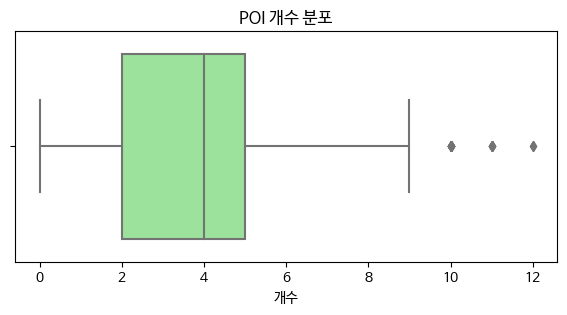

In [424]:
# ÎåÄÌëúÏ†ÅÏù∏ Ïó∞ÏÜçÌòï Î≥ÄÏàòÏù∏ ‚ÄúÏ†ÑÏö© Î©¥Ï†Å‚Äù Î≥ÄÏàò Í¥ÄÎ†®Ìïú Î∂ÑÌè¨Î•º Î®ºÏ†Ä ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = df_unique_YX, x = "POI_Í∞úÏàò", color="lightgreen")
plt.title("POI Í∞úÏàò Î∂ÑÌè¨")
plt.xlabel('Í∞úÏàò')
plt.show()

In [422]:
# Î©îÏù∏ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÍ≥º ÏÑúÎ∏å Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Î≥ëÌï©
concat_select = pd.merge(concat_select, df_unique_YX, on=['Ï¢åÌëúY', 'Ï¢åÌëúX'], how='left')

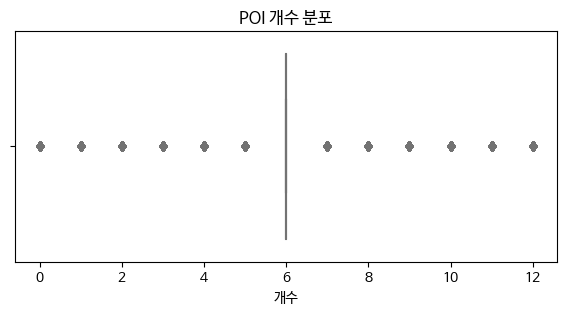

In [426]:
# ÎåÄÌëúÏ†ÅÏù∏ Ïó∞ÏÜçÌòï Î≥ÄÏàòÏù∏ ‚ÄúÏ†ÑÏö© Î©¥Ï†Å‚Äù Î≥ÄÏàò Í¥ÄÎ†®Ìïú Î∂ÑÌè¨Î•º Î®ºÏ†Ä ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = concat_select, x = "POI_Í∞úÏàò", color="lightgreen")
plt.title("POI Í∞úÏàò Î∂ÑÌè¨")
plt.xlabel('Í∞úÏàò')
plt.show()

In [425]:
print(concat_select.head())

      Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ    ÎèÑÎ°úÎ™Ö k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  \
0  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97    8  3  1987  Ïñ∏Ï£ºÎ°ú 3                ÏïÑÌååÌä∏   
1  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97   22  4  1987  Ïñ∏Ï£ºÎ°ú 3                ÏïÑÌååÌä∏   
2  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  54.98   28  5  1987  Ïñ∏Ï£ºÎ°ú 3                ÏïÑÌååÌä∏   
3  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97    3  4  1987  Ïñ∏Ï£ºÎ°ú 3                ÏïÑÌååÌä∏   
4  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97    8  2  1987  Ïñ∏Ï£ºÎ°ú 3                ÏïÑÌååÌä∏   

   ...                  Îã®ÏßÄÏã†Ï≤≠Ïùº    target is_test    Íµ¨    Îèô   Í≥ÑÏïΩÎÖÑ  Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  \
0  ...  2022-11-17 10:19:06.0  124000.0       0  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô  2017   12     1   
1  ...  2022-11-17 10:19:06.0  123500.0       0  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô  2017   12     1   
2  ...  2022-11-17 10:19:06.0   91500.0       0

## 5. Model Training

- Ïù¥Ï†ú ÏúÑÏóêÏÑú ÎßåÎì† ÌååÏÉùÎ≥ÄÏàòÎì§Í≥º Ï†ïÏ†úÌïú Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú Î≥∏Í≤©Ï†ÅÏúºÎ°ú Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞ÄÎ•º ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ÎßÅÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.
- Î™®Îç∏ÎßÅÏóêÎäî `sklearn`Ïùò `RandomForest`Î•º Ïù¥Ïö©ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

- Ï∞∏Í≥† ‚úÖ
  - `RandomForest`Îäî Î∞∞ÍπÖ(Bagging)Ïùò ÏùºÏ¢ÖÏúºÎ°ú, ÌïôÏäµÏãúÌÇ§Îäî Îç∞Ïù¥ÌÑ∞ Îøê ÏïÑÎãàÎùº ÌäπÏÑ±Î≥ÄÏàò(X)Îì§ÎèÑ Î¨¥ÏûëÏúÑÎ°ú ÏÑ†ÌÉùÌï¥ Ìä∏Î¶¨Î•º ÏÉùÏÑ±ÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
  - Î™®Îç∏ ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú ÏÑúÎ°ú Îã§Î•∏ NÍ∞úÏùò Tree ÏÉùÏÑ±ÌïòÍ≥†, NÍ∞úÏùò TreeÏóêÏÑú Î∞úÏÉùÌïú OutputÏùÑ Voting(Î≤îÏ£ºÌòï, Î∂ÑÎ•òÎ¨∏Ï†ú)ÌïòÍ±∞ÎÇò, Average(Ïó∞ÏÜçÌòï, ÌöåÍ∑ÄÎ¨∏Ï†ú)Ìï¥ ÏµúÏ¢Ö Output ÏÉùÏÑ±Ìï©ÎãàÎã§.
  - Ïù¥Îäî High variance, Low bias ÏÉÅÌô©ÏóêÏÑú Î∂ÑÏÇ∞(Variance) Í∞êÏÜåÏóê ÎèÑÏõÄÏùÑ Ï§çÎãàÎã§.

In [285]:
# Ïù¥Ï†ú Îã§Ïãú trainÍ≥º test datasetÏùÑ Î∂ÑÌï†Ìï¥Ï§çÎãàÎã§. ÏúÑÏóêÏÑú Ï†úÏûëÌï¥ ÎÜìÏïòÎçò is_test ÏπºÎüºÏùÑ Ïù¥Ïö©Ìï©ÎãàÎã§.
dt_train = concat_select.query('is_test==0')
dt_test = concat_select.query('is_test==1')

# Ïù¥Ï†ú is_test ÏπºÎüºÏùÄ dropÌï¥Ï§çÎãàÎã§.
dt_train.drop(['is_test'], axis = 1, inplace=True)
dt_test.drop(['is_test'], axis = 1, inplace=True)
print(dt_train.shape, dt_test.shape)

(1029574, 49) (9272, 49)


In [286]:
dt_test.head(1)

Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ    ÎèÑÎ°úÎ™Ö  \
1029574  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97   26  5  1987  Ïñ∏Ï£ºÎ°ú 3   

        k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  ...        Ï¢åÌëúY                  Îã®ÏßÄÏã†Ï≤≠Ïùº   target  \
1029574                ÏïÑÌååÌä∏  ...  37.476763  2022-11-17 10:19:06.0  13250.0   

           Íµ¨    Îèô   Í≥ÑÏïΩÎÖÑ  Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä Ïã†Ï∂ïÏó¨Î∂Ä POI_Í∞úÏàò  
1029574  Í∞ïÎÇ®Íµ¨  Í∞úÌè¨Îèô  2023   07     1    0      3  

[1 rows x 49 columns]

In [287]:
# dt_testÏùò targetÏùÄ ÏùºÎã® 0ÏúºÎ°ú ÏûÑÏùòÎ°ú Ï±ÑÏõåÏ£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
dt_test['target'] = 0

### 5.1. Î≤îÏ£ºÌòï Î≥ÄÏàò Encoding
- Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî Í∑∏ÎåÄÎ°ú Î™®Îç∏Ïóê Ìà¨ÏûÖÌïòÎ©¥, Î™®Îç∏Ïù¥ Ï†úÎåÄÎ°ú ÏûëÎèôÌï† Ïàò ÏóÜÏäµÎãàÎã§.
- Îî∞ÎùºÏÑú **Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Í≥ºÏ†ï**ÏùÑ ÌÜµÌï¥ Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ÏùÑ numericÌïòÍ≤å Î∞îÍæ∏Îäî Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏùÑ ÏßÑÌñâÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

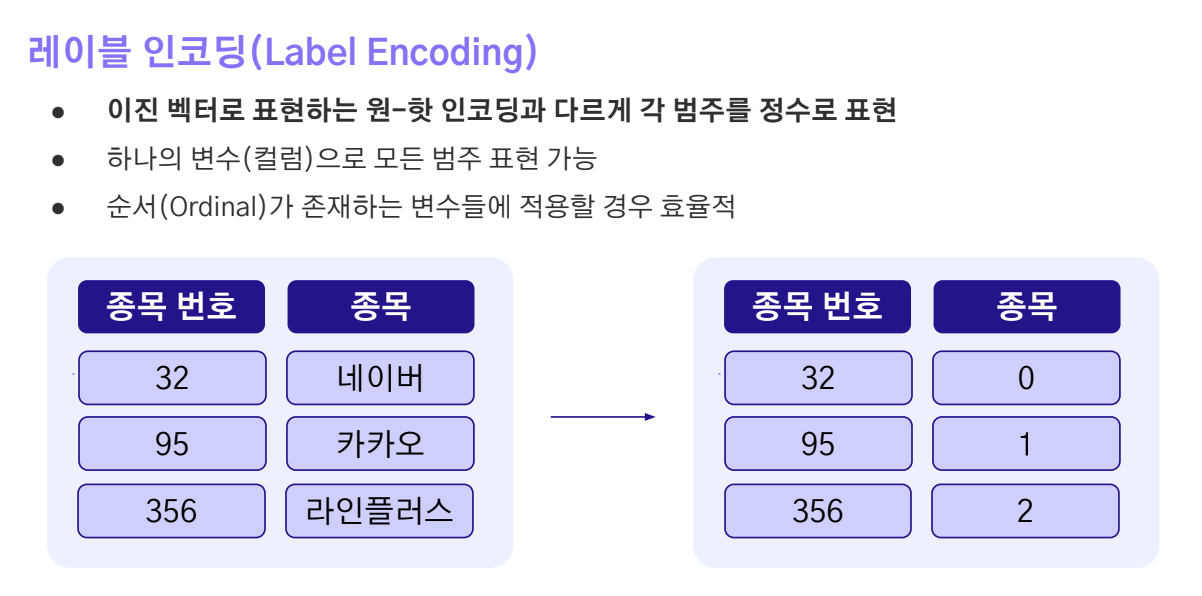

In [288]:
# ÌååÏÉùÎ≥ÄÏàò Ï†úÏûëÏúºÎ°ú Ï∂îÍ∞ÄÎêú Î≥ÄÏàòÎì§Ïù¥ Ï°¥Ïû¨ÌïòÍ∏∞Ïóê, Îã§ÏãúÌïúÎ≤à Ïó∞ÏÜçÌòïÍ≥º Î≤îÏ£ºÌòï ÏπºÎüºÏùÑ Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns_v2 = []
categorical_columns_v2 = []

for column in dt_train.columns:
    if pd.api.types.is_numeric_dtype(dt_train[column]):
        continuous_columns_v2.append(column)
    else:
        categorical_columns_v2.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns_v2)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns_v2)

Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'Í∞ïÎÇ®Ïó¨Î∂Ä', 'Ïã†Ï∂ïÏó¨Î∂Ä', 'POI_Í∞úÏàò']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'ÎèÑÎ°úÎ™Ö', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'Íµ¨', 'Îèô', 'Í≥ÑÏï

In [289]:
# ÏïÑÎûòÏóêÏÑú Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ÏùÑ ÎåÄÏÉÅÏúºÎ°ú Î†àÏù¥Î∏îÏù∏ÏΩîÎî©ÏùÑ ÏßÑÌñâÌï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌïú LabelEncoderÎ•º Ï†ÄÏû•Ìï† ÎîïÏÖîÎÑàÎ¶¨
label_encoders = {}

# Implement Label Encoding
for col in tqdm( categorical_columns_v2 ):
    lbl = LabelEncoder()

    # Label-EncodingÏùÑ fit
    lbl.fit( dt_train[col].astype(str) )
    dt_train[col] = lbl.transform(dt_train[col].astype(str))
    label_encoders[col] = lbl           # ÎÇòÏ§ëÏóê ÌõÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ Î†àÏù¥Î∏îÏù∏ÏΩîÎçîÎ•º Ï†ÄÏû•Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

    # Test Îç∞Ïù¥ÌÑ∞ÏóêÎßå Ï°¥Ïû¨ÌïòÎäî ÏÉàÎ°ú Ï∂úÌòÑÌïú Îç∞Ïù¥ÌÑ∞Î•º Ïã†Í∑ú ÌÅ¥ÎûòÏä§Î°ú Ï∂îÍ∞ÄÌï¥Ï§çÎãàÎã§.
    for label in np.unique(dt_test[col]):
      if label not in lbl.classes_: # unseen label Îç∞Ïù¥ÌÑ∞Ïù∏ Í≤ΩÏö∞
        lbl.classes_ = np.append(lbl.classes_, label) # ÎØ∏Ï≤òÎ¶¨ Ïãú ValueErrorÎ∞úÏÉùÌïòÎãà Ï£ºÏùòÌïòÏÑ∏Ïöî!

    dt_test[col] = lbl.transform(dt_test[col].astype(str))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 29/29 [00:07<00:00,  3.74it/s]


In [290]:
dt_train.head(1)        # Î†àÏù¥Î∏îÏù∏ÏΩîÎî©Ïù¥ Îêú Î™®ÏäµÏûÖÎãàÎã§.

Î≤àÏßÄ    Î≥∏Î≤à  Î∂ÄÎ≤à  ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ   ÎèÑÎ°úÎ™Ö  k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  ...  \
0  4282  1114   1   293  79.97    8  3  1987  5520                   3  ...   

         Ï¢åÌëúY  Îã®ÏßÄÏã†Ï≤≠Ïùº    target  Íµ¨  Îèô  Í≥ÑÏïΩÎÖÑ  Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  POI_Í∞úÏàò  
0  37.476763    240  124000.0  0  8   10   11     1     0       3  

[1 rows x 49 columns]

### 5.2. Model Training
- ÏúÑ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©Ìï¥ Î™®Îç∏ÏùÑ train Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§. Î™®Îç∏ÏùÄ RandomForestÎ•º Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
- TrainÍ≥º Valid datasetÏùÑ Î∂ÑÌï†ÌïòÎäî Í≥ºÏ†ïÏóêÏÑúÎäî `holdout` Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§. Ïù¥ Î∞©Î≤ïÏùò Í≤ΩÏö∞  ÎåÄÎûµÏ†ÅÏù∏ ÏÑ±Îä•ÏùÑ Îπ†Î•¥Í≤å ÌôïÏù∏Ìï† Ïàò ÏûàÎã§Îäî Ï†êÏóêÏÑú baselineÏóêÏÑú ÏÇ¨Ïö©Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
  - Ïù¥ ÌõÑ Ï∂îÍ∞ÄÏ†ÅÏù∏ edaÎ•º ÌÜµÌï¥ÏÑú ÌèâÍ∞ÄÏÑ∏Ìä∏ÏôÄ Í≤ΩÌñ•ÏùÑ ÎßûÏ∂îÍ±∞ÎÇò kfoldÏôÄ Í∞ôÏùÄ Î∂ÑÌè¨Ïóê ÎåÄÌïú Í≥†Î†§Î•º Ï∂îÍ∞ÄÌï† Ïàò ÏûàÏäµÎãàÎã§.

In [291]:
assert dt_train.shape[1] == dt_test.shape[1]          # train/test datasetÏùò shapeÏù¥ Í∞ôÏùÄÏßÄ ÌôïÏù∏Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

In [292]:
# TargetÍ≥º ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§ÏùÑ Î∂ÑÎ¶¨Ìï¥Ï§çÎãàÎã§.
y_train = dt_train['target']
X_train = dt_train.drop(['target'], axis=1)

# Hold out splitÏùÑ ÏÇ¨Ïö©Ìï¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º 8:2 ÎπÑÏú®Î°ú ÎÇòÎàÑÍ≤†ÏäµÎãàÎã§.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)

In [293]:
# RandomForestRegressorÎ•º Ïù¥Ïö©Ìï¥ ÌöåÍ∑Ä Î™®Îç∏ÏùÑ Ï†ÅÌï©ÏãúÌÇ§Í≤†ÏäµÎãàÎã§.
model = RandomForestRegressor(n_estimators=5, criterion='squared_error', random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
pred = model.predict(X_val)

- ÎûúÎç§Ìè¨Î†àÏä§Ìä∏Ïùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ÎèÑ Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÍ≤å ÏßÄÏ†ïÌï¥Ï§Ñ Ïàò ÏûàÏäµÎãàÎã§. Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÎäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÎäî Í≤ÉÎèÑ ÏÑ±Îä• Ìñ•ÏÉÅÏóê ÎèÑÏõÄÏù¥ Îê† Ïàò ÏûàÏäµÎãàÎã§.

In [294]:
# ÌöåÍ∑Ä Í¥ÄÎ†® metricÏùÑ ÌÜµÌï¥ train/validÏùò Î™®Îç∏ Ï†ÅÌï© Í≤∞Í≥ºÎ•º Í¥ÄÏ∞∞Ìï©ÎãàÎã§.
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val, pred))}')

RMSE test: 5844.261100775088


- Î≥ÄÏàò Ï§ëÏöîÎèÑÎèÑ ÌôïÏù∏Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

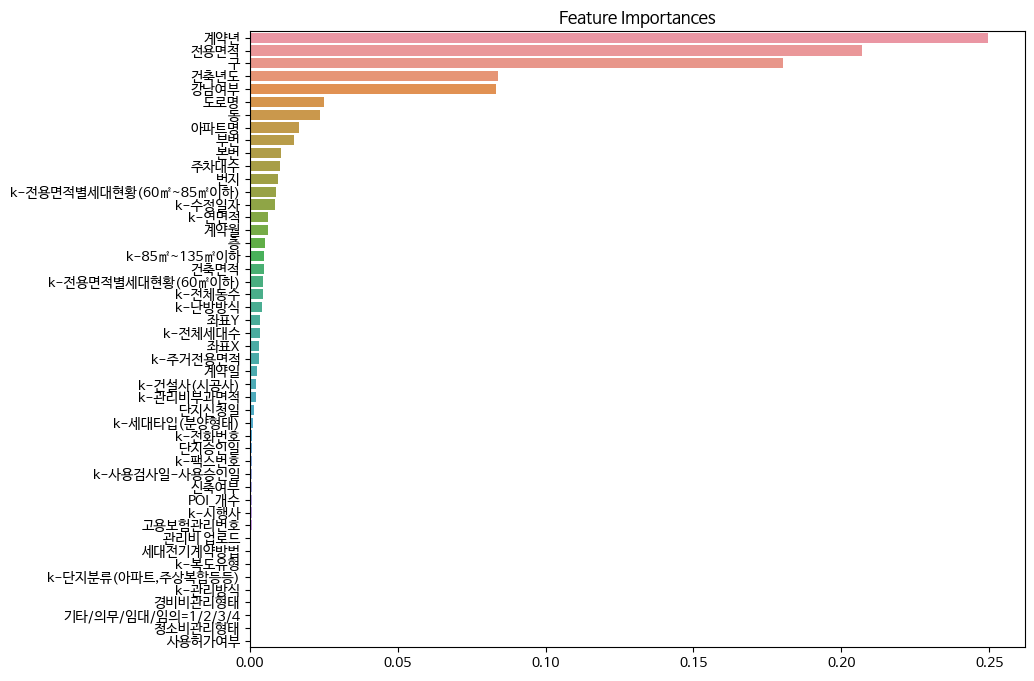

In [295]:
# ÏúÑ feature importanceÎ•º ÏãúÍ∞ÅÌôîÌï¥Î¥ÖÎãàÎã§.
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.show()

In [107]:
# ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§. Pickle ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
with open('saved_model.pkl', 'wb') as f:
    pickle.dump(model, f)

### 5.3. Feature selection

- Ïñ¥Îñ§ Î≥ÄÏàòÍ∞Ä Ïú†Ïö©Ìïú Î≥ÄÏàòÏù∏ÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í∏∞ ÏúÑÌï¥ permutation selectionÏùÑ Ïù¥Ïö©Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [108]:
# Permutation importance Î∞©Î≤ïÏùÑ Î≥ÄÏàò ÏÑ†ÌÉùÏóê Ïù¥Ïö©Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
perm = PermutationImportance(model,        # ÏúÑÏóêÏÑú ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
                             scoring = "neg_mean_squared_error",        # ÌèâÍ∞Ä ÏßÄÌëúÎ°úÎäî ÌöåÍ∑ÄÎ¨∏Ï†úÏù¥Í∏∞Ïóê negative rmseÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§. (neg_mean_squared_error : ÏùåÏùò ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®)
                             random_state = 42,
                             n_iter=3).fit(X_val, y_val)
eli5.show_weights(perm, feature_names = X_val.columns.tolist())    # valid dataÏóê ÎåÄÌï¥ Ï†ÅÌï©ÏãúÌÇµÎãàÎã§.

- Î∂ÑÏÑù Í≤∞Í≥º "Í≥ÑÏïΩÎÖÑ", "Ï†ÑÏö©Î©¥Ï†Å" Î≥ÄÏàòÍ∞Ä Ïú†ÏùòÌïú Î≥ÄÏàòÎ°ú Î≥¥ÏûÖÎãàÎã§. Îî∞ÎùºÏÑú Ïù¥ Î≥ÄÏàòÎ°ú Îòê Îã§Î•∏ ÌååÏÉùÎ≥ÄÏàòÎ•º Îçî ÏÉùÏÑ±Ìï¥Î≥¥Í±∞ÎÇò, Ï§ëÏöîÎèÑÍ∞Ä ÎÇÆÏïÑÎ≥¥Ïù¥Îäî Î≥ÄÏàòÎ•º Ï†úÍ±∞Ìï¥ Ï∞®ÏõêÏùò Ï†ÄÏ£ºÎ•º ÎßâÏïÑÎ≥º ÏàòÎèÑ ÏûàÏäµÎãàÎã§.

### 5.4. Valid prediction Î∂ÑÏÑù

- ÏòàÏ∏°Í∞íÏùÑ Î∂ÑÏÑùÌï¥Î≥¥Í∏∞ ÏúÑÌï¥ valid predictionÏùÑ ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [109]:
# Validation datasetÏóê targetÍ≥º pred Í∞íÏùÑ Ï±ÑÏõåÏ£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
X_val['target'] = y_val
X_val['pred'] = pred

In [110]:
# Squared_errorÎ•º Í≥ÑÏÇ∞ÌïòÎäî Ìï®ÏàòÎ•º Ï†ïÏùòÌïòÍ≤†ÏäµÎãàÎã§.
def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

# RMSE Í≥ÑÏÇ∞
squared_errors = calculate_se(X_val['target'], X_val['pred'])
X_val['error'] = squared_errors

In [111]:
# ErrorÍ∞Ä ÌÅ∞ ÏàúÏÑúÎåÄÎ°ú sorting Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§.
X_val_sort = X_val.sort_values(by='error', ascending=False)       # ÎÇ¥Î¶ºÏ∞®Ïàú sorting

In [112]:
X_val_sort.head()

Î≤àÏßÄ    Î≥∏Î≤à   Î∂ÄÎ≤à  ÏïÑÌååÌä∏Î™Ö    Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ   ÎèÑÎ°úÎ™Ö  k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  \
232753  4866  1223    0  2080  107.47   11  1  1973  5026                   0   
58002    509   164    0  5327  122.10   10  2  1982  5031                   0   
224608  4125  1074  258  4766   91.68   27  3  2017  2220                   0   
423713  1094   413    0  3571   78.50   18  8  2018  6688                   0   
240000  3626   953   14   200   79.47   17  9  1974  5248                   0   

        ...  Îã®ÏßÄÏã†Ï≤≠Ïùº   Íµ¨    Îèô  Í≥ÑÏïΩÎÖÑ  Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä    target      pred  \
232753  ...    249  14  111   15    0     1     0  287000.0  537200.0   
58002   ...    249  14  111   11    2     1     0  350000.0  120800.0   
224608  ...    249   0  281   15    5     1     1  117562.0  300600.0   
423713  ...    249  14  256   12    1     1     1  109258.0  260800.0   
240000  ...    249   0  179   14    6     1     0   81500.0  230000.0   

               error  
232753  6.260004e+10  
58002   5.253264e+10  
224608  3.350291e+10  
423713  2.296498e+10  
240000  2.205225e+10  

[5 rows x 50 columns]

- ÏòàÏ∏°ÏùÑ Ïûò ÌïòÏßÄ Î™ªÌïú top 100Í∞úÏùò Îç∞Ïù¥ÌÑ∞ÏôÄ ÏòàÏ∏°ÏùÑ ÏûòÌïú top 100Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÎπÑÍµêÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [113]:
X_val_sort_top100 = X_val.sort_values(by='error', ascending=False).head(100)        # ÏòàÏ∏°ÏùÑ Ïûò ÌïòÏßÄÎ™ªÌïú top 100Í∞úÏùò data
X_val_sort_tail100 = X_val.sort_values(by='error', ascending=False).tail(100)       # ÏòàÏ∏°ÏùÑ ÏûòÌïú top 100Í∞úÏùò data

In [114]:
# Ìï¥ÏÑùÏùÑ ÏúÑÌï¥ Î†àÏù¥Î∏îÏù∏ÏΩîÎî© Îêú Î≥ÄÏàòÎ•º Î≥µÏõêÌï¥Ï§çÎãàÎã§.
error_top100 = X_val_sort_top100.copy()
for column in categorical_columns_v2 :     # ÏïûÏÑú Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏóêÏÑú Ï†ïÏùòÌñàÎçò categorical_columns_v2 Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

best_top100 = X_val_sort_tail100.copy()
for column in categorical_columns_v2 :     # ÏïûÏÑú Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏóêÏÑú Ï†ïÏùòÌñàÎçò categorical_columns_v2 Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

In [115]:
display(error_top100.head(1))
display(best_top100.head(1))

Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à     ÏïÑÌååÌä∏Î™Ö    Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ      ÎèÑÎ°úÎ™Ö  \
232753  757  757.0  0.0  Î∞òÌè¨Ï£ºÍ≥µ1Îã®ÏßÄ  107.47   11  1  1973  Ïã†Î∞òÌè¨Î°ú 45   

       k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  ... Îã®ÏßÄÏã†Ï≤≠Ïùº    Íµ¨    Îèô   Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä    target  \
232753               NULL  ...  NULL  ÏÑúÏ¥àÍµ¨  Î∞òÌè¨Îèô  2022  01    1     0  287000.0   

            pred         error  
232753  537200.0  6.260004e+10  

[1 rows x 50 columns]

Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ      ÎèÑÎ°úÎ™Ö  \
476444  666  666.0  0.0  ÏÉÅÍ≥ÑÏ£ºÍ≥µ10  49.94   27  6  1988  ÎÖ∏ÏõêÎ°ú 564   

       k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  ... Îã®ÏßÄÏã†Ï≤≠Ïùº    Íµ¨    Îèô   Í≥ÑÏïΩÎÖÑ Í≥ÑÏïΩÏõî Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä   target  \
476444               NULL  ...  NULL  ÎÖ∏ÏõêÍµ¨  ÏÉÅÍ≥ÑÎèô  2017  04    0     0  29700.0   

           pred error  
476444  29700.0   0.0  

[1 rows x 50 columns]

- Ïù¥Ï†ú Î∂ÑÌè¨Î•º ÎπÑÍµêÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

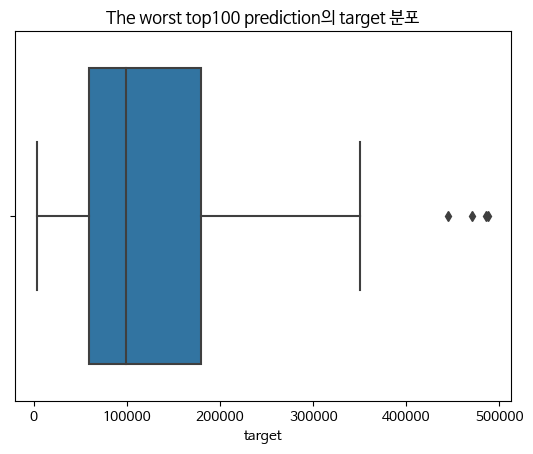

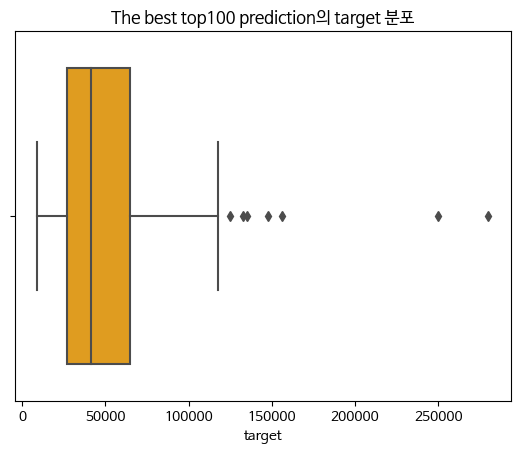

In [116]:
sns.boxplot(data = error_top100, x='target')
plt.title('The worst top100 predictionÏùò target Î∂ÑÌè¨')
plt.show()

sns.boxplot(data = best_top100, x='target', color='orange')
plt.title('The best top100 predictionÏùò target Î∂ÑÌè¨')
plt.show()

- Taget Î∂ÑÌè¨Î•º Î≥¥Îãà Ï¢ãÏùÄ ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ top 100Í∞úÏùò dataÎ≥¥Îã§ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇòÏÅú ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ top 100 datasetÎì§Ïù¥ ÎÜíÏùÄ Í∞ÄÍ≤©ÏùÑ Î≥¥ÏòÄÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Ïóê ÎåÄÌïú Î™®Îç∏ÎßÅ Î∞è Ï≤òÎ¶¨Í∞Ä ÌïÑÏöîÌï¥Î≥¥ÏûÖÎãàÎã§.

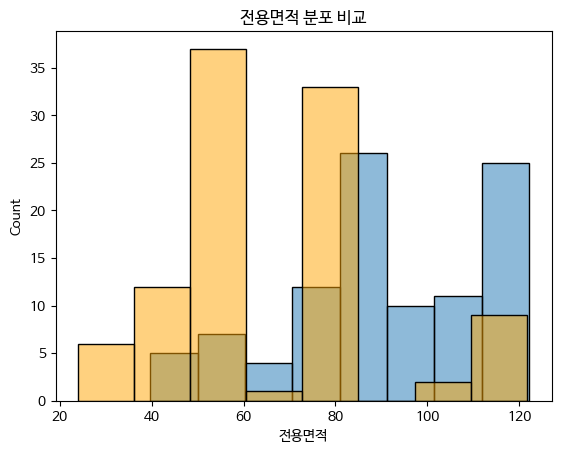

In [117]:
sns.histplot(data = error_top100, x='Ï†ÑÏö©Î©¥Ï†Å', alpha=0.5)
sns.histplot(data = best_top100, x='Ï†ÑÏö©Î©¥Ï†Å', color='orange', alpha=0.5)
plt.title('Ï†ÑÏö©Î©¥Ï†Å Î∂ÑÌè¨ ÎπÑÍµê')
plt.show()

- Ï†ÑÏö©Î©¥Ï†Å ÎòêÌïú ÎÇòÏÅú ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ ÏßëÎì§Ïù¥ Îçî ÎÑìÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

## 6. Inference

In [118]:
dt_test.head(2)      # test datasetÏóê ÎåÄÌïú inferenceÎ•º ÏßÑÌñâÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

Î≤àÏßÄ    Î≥∏Î≤à  Î∂ÄÎ≤à  ÏïÑÌååÌä∏Î™Ö      Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ   ÎèÑÎ°úÎ™Ö  k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  \
0  4282  1114   1   293   79.9700   26   5  1987  5520                   3   
1  4258  1107   1   294  108.2017   15  10  2021   431                   3   

   ...         Ï¢åÌëúX        Ï¢åÌëúY  Îã®ÏßÄÏã†Ï≤≠Ïùº  target  Íµ¨  Îèô  Í≥ÑÏïΩÎÖÑ  Í≥ÑÏïΩÏõî  Í∞ïÎÇ®Ïó¨Î∂Ä  Ïã†Ï∂ïÏó¨Î∂Ä  
0  ...  127.057210  37.476763    240       0  0  8   16    6     1     0  
1  ...  127.056394  37.484892    236       0  0  8   16    7     1     1  

[2 rows x 48 columns]

In [119]:
# Ï†ÄÏû•Îêú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
with open('saved_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [120]:
%%time
X_test = dt_test.drop(['target'], axis=1)

# Test datasetÏóê ÎåÄÌïú inferenceÎ•º ÏßÑÌñâÌï©ÎãàÎã§.
real_test_pred = model.predict(X_test)

CPU times: user 21 ms, sys: 4.29 ms, total: 25.3 ms
Wall time: 19.3 ms


In [121]:
real_test_pred          # ÏòàÏ∏°Í∞íÎì§Ïù¥ Ï∂úÎ†•Îê®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

array([214200., 253640., 226500., ...,  78500.,  75700.,  71560.])

## 7. Output File Save

In [ ]:
# ÏïûÏÑú ÏòàÏ∏°Ìïú ÏòàÏ∏°Í∞íÎì§ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
preds_df = pd.DataFrame(real_test_pred.astype(int), columns=["target"])
preds_df.to_csv('output.csv', index=False)